In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
data = pd.read_csv("./통신고객이탈.csv", engine="python")
data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
data.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
data.drop("CUSTOMER_ID",axis=1,inplace=True)
data.CHURN.value_counts()

Active     750
Churned    180
Name: CHURN, dtype: int64

In [6]:
data.CHURN = data.CHURN.map(lambda x : 0 if x == 'Active' else 1)
data.CHURN.value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [7]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

df_y = data_dummy.CHURN
df_x = data_dummy.drop("CHURN",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (651, 33)
train data Y size: (651,)
test data X size: (279, 33)
test data Y size: (279,)


In [9]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 0.971
Accucary on test set: 0.885


In [10]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.659297,0.121772,-0.191707,1.476872,1.496854,-0.518328,0.678178,1.575792,1.532985,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
1,0.736049,0.786591,2.396339,-0.661815,-0.534734,-0.075671,-0.284308,-0.569331,-0.143503,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
2,-0.415244,1.480625,-0.766829,1.432593,1.087469,-1.024223,-1.356793,0.979029,0.475336,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
3,-0.568749,1.178499,-0.191707,0.117500,-0.452149,-0.644802,-0.944298,-0.287078,-0.953914,0.915960,...,-0.46075,-0.111542,-0.111542,2.671610,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
4,0.045274,1.520528,2.108779,-0.431563,-0.870973,-0.771276,1.745163,-0.750780,-0.956148,-1.091751,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223


In [11]:
gb_scaled = GradientBoostingClassifier(random_state=1234)
gb_scaled.fit(df_train_x_scaled,df_train_y)

print("Accucary on training set: {:.3f}".format(gb_scaled.score(df_train_x_scaled,df_train_y)))
print("Accucary on test set: {:.3f}".format(gb_scaled.score(df_test_x_scaled,df_test_y)))

Accucary on training set: 0.971
Accucary on test set: 0.910


In [12]:
train_accuracy = []
test_accuracy = []

for lr in range(1,100,5):
    gb1 = GradientBoostingClassifier(learning_rate=lr/100,random_state=1234)
    gb1.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(gb1.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(gb1.score(df_test_x_scaled,df_test_y))
    
df_accruacy1 = pd.DataFrame()
df_accruacy1["LearningRate"] = [lr/100 for lr in range(1,100,5)]
df_accruacy1["TrainAccuracy"] = train_accuracy
df_accruacy1["TestAccuracy"] = test_accuracy

In [13]:
df_accruacy1.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.01,0.879,0.896
1,0.06,0.946,0.907
2,0.11,0.969,0.903
3,0.16,0.989,0.900
4,0.21,0.998,0.892
5,0.26,1.000,0.875
6,0.31,1.000,0.896
7,0.36,1.000,0.882
8,0.41,1.000,0.889
9,0.46,1.000,0.896


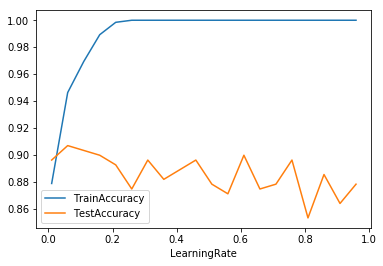

In [16]:
df_accruacy1.set_index("LearningRate",inplace=False).plot.line()

In [17]:
train_accuracy = []
test_accuracy = []

para_estimators = [estimators for estimators in range(50,150,10)]
lr = 0.2

for estimators in para_estimators:
    gb2 = GradientBoostingClassifier(learning_rate=lr,n_estimators=estimators,random_state=1234)
    gb2.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(gb2.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(gb2.score(df_test_x_scaled,df_test_y))
    
df_accruacy2 = pd.DataFrame()
df_accruacy2["Estimators"] = para_estimators
df_accruacy2["TrainAccuracy"] = train_accuracy
df_accruacy2["TestAccuracy"] = test_accuracy

In [18]:
df_accruacy2.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,50,0.971,0.910
1,60,0.978,0.910
2,70,0.985,0.907
3,80,0.992,0.910
4,90,0.997,0.907
5,100,0.998,0.907
6,110,0.998,0.907
7,120,1.000,0.907
8,130,1.000,0.900
9,140,1.000,0.907


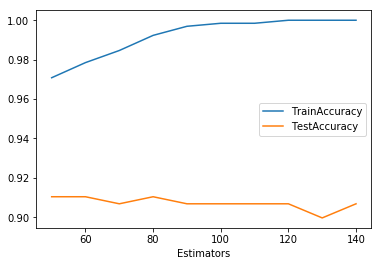

In [19]:
df_accruacy2.set_index("Estimators",inplace=False).plot()

In [20]:
train_accuracy = []
test_accuracy = []

lr = 0.2; n_estimators = 100;
para_max_depth = [i+1 for i in range(5)]

for depth in para_max_depth:
    gb3 = GradientBoostingClassifier(learning_rate=lr,n_estimators=n_estimators, max_depth= depth,random_state=1234)
    gb3.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(gb3.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(gb3.score(df_test_x_scaled,df_test_y))
    
df_accruacy3 = pd.DataFrame()
df_accruacy3["MaxDepth"] = para_max_depth
df_accruacy3["TrainAccuracy"] = train_accuracy
df_accruacy3["TestAccuracy"] = test_accuracy

In [21]:
df_accruacy3.round(3)

,MaxDepth,TrainAccuracy,TestAccuracy
0,1,0.914,0.903
1,2,0.968,0.892
2,3,0.998,0.907
3,4,1.000,0.896
4,5,1.000,0.889


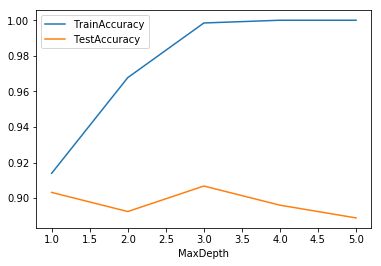

In [22]:
df_accruacy3.set_index("MaxDepth",inplace=False).plot()

In [23]:
train_accuracy = []
test_accuracy = []

lr = 0.2; n_estimators = 100; max_depth = 3;
para_min_leaf_size = [i+1 for i in range(10)]

for leafsize in para_min_leaf_size:
    gb4 = GradientBoostingClassifier(learning_rate=lr,n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=leafsize, random_state=1234)
    gb4.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(gb4.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(gb4.score(df_test_x_scaled,df_test_y))
    
df_accruacy4 = pd.DataFrame()
df_accruacy4["MinLeafSize"] = para_min_leaf_size
df_accruacy4["TrainAccuracy"] = train_accuracy
df_accruacy4["TestAccuracy"] = test_accuracy

In [24]:
df_accruacy4.round(3)

,MinLeafSize,TrainAccuracy,TestAccuracy
0,1,0.998,0.907
1,2,0.997,0.900
2,3,0.995,0.900
3,4,0.994,0.900
4,5,0.994,0.889
5,6,0.994,0.903
6,7,0.994,0.900
7,8,0.994,0.907
8,9,0.994,0.900
9,10,0.992,0.914


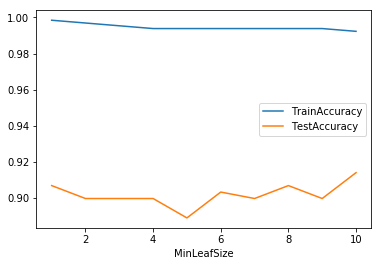

In [25]:
df_accruacy4.set_index("MinLeafSize",inplace=False).plot()

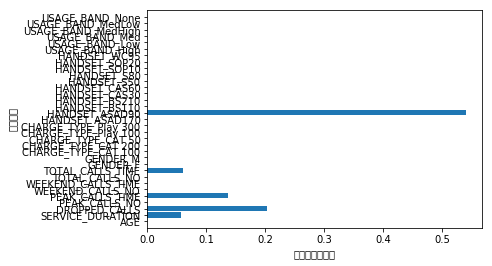

In [26]:
gb_model = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,min_samples_leaf=30, n_estimators=5,random_state=1234)
gb_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = gb_model.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(gb_model)